# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset:

Import the necessary libraries and create your dataframe(s).

In [48]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import plotly.express as px



# read the data
df = pd.read_csv(r'C:\Users\ardie\LaunchCode\data-analysis-projects\Final Project\Neisseria\metadata.csv')
df.head()

,Sample_ID,Year,Country,Continent,Beta.lactamase,Azithromycin,Ciprofloxacin,Ceftriaxone,Cefixime,Tetracycline,...,log2_cro_mic,log2_cfx_mic,log2_tet_mic,log2_pen_mic,azm_sr,cip_sr,cro_sr,cfx_sr,tet_sr,pen_sr
0,ERR1549286,2015.0,UK,Europe,NaN,>256,NaN,0.016,NaN,NaN,...,-5.965784,NaN,NaN,NaN,1.0,NaN,0.0,NaN,NaN,NaN
1,ERR1549290,2015.0,UK,Europe,NaN,>256,NaN,0.004,NaN,NaN,...,-7.965784,NaN,NaN,NaN,1.0,NaN,0.0,NaN,NaN,NaN
2,ERR1549291,2015.0,UK,Europe,NaN,>256,NaN,0.006,NaN,NaN,...,-7.380822,NaN,NaN,NaN,1.0,NaN,0.0,NaN,NaN,NaN
3,ERR1549287,2015.0,UK,Europe,NaN,>256,NaN,0.006,NaN,NaN,...,-7.380822,NaN,NaN,NaN,1.0,NaN,0.0,NaN,NaN,NaN
4,ERR1549288,2015.0,UK,Europe,NaN,>256,NaN,0.008,NaN,NaN,...,-6.965784,NaN,NaN,NaN,1.0,NaN,0.0,NaN,NaN,NaN


## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [49]:
# check for missing values
df.isnull().sum()

Sample_ID            0
Year               250
Country              1
Continent            1
Beta.lactamase    1859
Azithromycin       306
Ciprofloxacin      657
Ceftriaxone        350
Cefixime           381
Tetracycline      2314
Penicillin        2321
NG_MAST              7
Group                0
azm_mic            308
cip_mic            698
cro_mic            352
cfx_mic            385
tet_mic           2314
pen_mic           2321
log2_azm_mic       308
log2_cip_mic       698
log2_cro_mic       352
log2_cfx_mic       385
log2_tet_mic      2314
log2_pen_mic      2321
azm_sr             308
cip_sr             698
cro_sr             352
cfx_sr             385
tet_sr            2314
pen_sr            2321
dtype: int64

In [50]:
# % of missing values
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Sample_ID - 0%
Year - 7%
Country - 0%
Continent - 0%
Beta.lactamase - 49%
Azithromycin - 8%
Ciprofloxacin - 17%
Ceftriaxone - 9%
Cefixime - 10%
Tetracycline - 61%
Penicillin - 61%
NG_MAST - 0%
Group - 0%
azm_mic - 8%
cip_mic - 18%
cro_mic - 9%
cfx_mic - 10%
tet_mic - 61%
pen_mic - 61%
log2_azm_mic - 8%
log2_cip_mic - 18%
log2_cro_mic - 9%
log2_cfx_mic - 10%
log2_tet_mic - 61%
log2_pen_mic - 61%
azm_sr - 8%
cip_sr - 18%
cro_sr - 9%
cfx_sr - 10%
tet_sr - 61%
pen_sr - 61%


In [52]:
#filling na values for categorial data
df["Year"] = df["Year"].fillna("unknown")
df["Country"] = df["Country"].fillna("x")
df["Continent"] = df["Continent"].fillna("Y")

In [53]:
# # Updating the values in 'azm_sr', 'cip_sr', 'cro_sr', 'cfx_sr', where 0 = "Sensitive" and 1 = "Resistance"
df = df.replace({'azm_sr': {0: "Sensitive", 1: "Resistant"},
                'cip_sr': {0: "Sensitive", 1: "Resistant"},
                'cro_sr': {0: "Sensitive", 1: "Resistant"},
                'cfx_sr': {0: "Sensitive", 1: "Resistant"}}
                 )

In [54]:
df.head()

,Sample_ID,Year,Country,Continent,Beta.lactamase,Azithromycin,Ciprofloxacin,Ceftriaxone,Cefixime,Tetracycline,...,log2_cro_mic,log2_cfx_mic,log2_tet_mic,log2_pen_mic,azm_sr,cip_sr,cro_sr,cfx_sr,tet_sr,pen_sr
0,ERR1549286,2015.0,UK,Europe,NaN,>256,NaN,0.016,NaN,NaN,...,-5.965784,NaN,NaN,NaN,Resistant,NaN,Sensitive,NaN,NaN,NaN
1,ERR1549290,2015.0,UK,Europe,NaN,>256,NaN,0.004,NaN,NaN,...,-7.965784,NaN,NaN,NaN,Resistant,NaN,Sensitive,NaN,NaN,NaN
2,ERR1549291,2015.0,UK,Europe,NaN,>256,NaN,0.006,NaN,NaN,...,-7.380822,NaN,NaN,NaN,Resistant,NaN,Sensitive,NaN,NaN,NaN
3,ERR1549287,2015.0,UK,Europe,NaN,>256,NaN,0.006,NaN,NaN,...,-7.380822,NaN,NaN,NaN,Resistant,NaN,Sensitive,NaN,NaN,NaN
4,ERR1549288,2015.0,UK,Europe,NaN,>256,NaN,0.008,NaN,NaN,...,-6.965784,NaN,NaN,NaN,Resistant,NaN,Sensitive,NaN,NaN,NaN


In [55]:
# Renaming columns for easier comprehension, #mic=minimum inhibitory concentration
df = df.rename(columns={"azm_mic": "Azithromycin mic", 
                        "cip_mic": "Ciprofloxacin mic", 
                        "cro_mic": "Ceftriaxone mic", 
                        "cfx_mic": "Cefixime mic", 
                        'log2_azm_mic':'Azithromycin log mic',
                        'log2_cip_mic':'Ciprofloxacin log mic',
                        'log2_cro_mic':'Ceftriaxone log mic',
                        'log2_cfx_mic':'Cefixime log mic',
                        'azm_sr': 'Azithromycin sr',
                        'cip_sr': 'Ciprofloxacin sr',
                        'cro_sr': 'Ceftriaxone sr',
                        'cfx_sr': 'Cefixime sr'})

In [56]:
df.head()

,Sample_ID,Year,Country,Continent,Beta.lactamase,Azithromycin,Ciprofloxacin,Ceftriaxone,Cefixime,Tetracycline,...,Ceftriaxone log mic,Cefixime log mic,log2_tet_mic,log2_pen_mic,Azithromycin sr,Ciprofloxacin sr,Ceftriaxone sr,Cefixime sr,tet_sr,pen_sr
0,ERR1549286,2015.0,UK,Europe,NaN,>256,NaN,0.016,NaN,NaN,...,-5.965784,NaN,NaN,NaN,Resistant,NaN,Sensitive,NaN,NaN,NaN
1,ERR1549290,2015.0,UK,Europe,NaN,>256,NaN,0.004,NaN,NaN,...,-7.965784,NaN,NaN,NaN,Resistant,NaN,Sensitive,NaN,NaN,NaN
2,ERR1549291,2015.0,UK,Europe,NaN,>256,NaN,0.006,NaN,NaN,...,-7.380822,NaN,NaN,NaN,Resistant,NaN,Sensitive,NaN,NaN,NaN
3,ERR1549287,2015.0,UK,Europe,NaN,>256,NaN,0.006,NaN,NaN,...,-7.380822,NaN,NaN,NaN,Resistant,NaN,Sensitive,NaN,NaN,NaN
4,ERR1549288,2015.0,UK,Europe,NaN,>256,NaN,0.008,NaN,NaN,...,-6.965784,NaN,NaN,NaN,Resistant,NaN,Sensitive,NaN,NaN,NaN


## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

Text(0, 0.5, 'log2 of MIC')

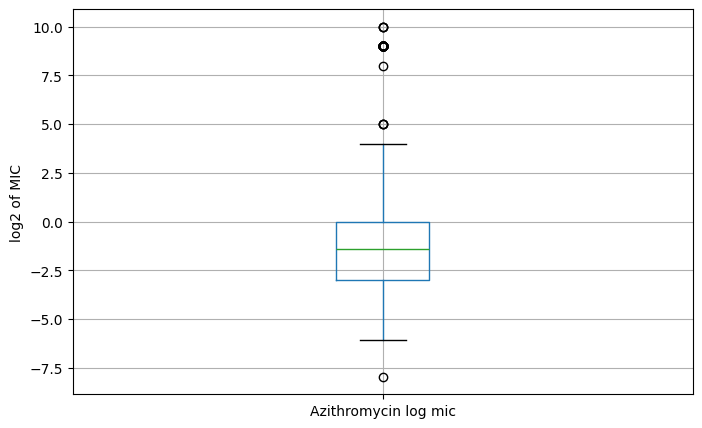

In [57]:
# boxplot to detect outliers
plt.figure(figsize=(8,5))
df.boxplot(column='Azithromycin log mic')
plt.ylabel("log2 of MIC")

Text(0, 0.5, 'log2 of MIC')

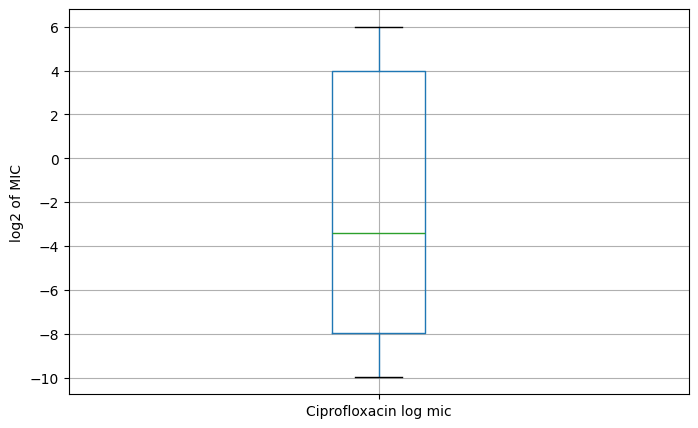

In [58]:
plt.figure(figsize=(8,5))
df.boxplot(column='Ciprofloxacin log mic')
plt.ylabel("log2 of MIC")

Text(0, 0.5, 'log2 of MIC')

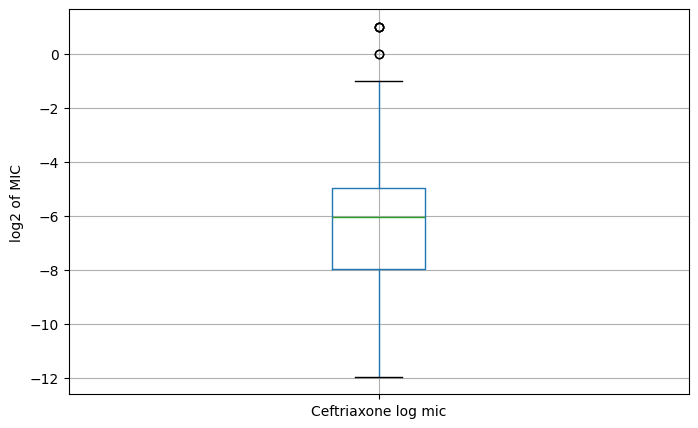

In [59]:
plt.figure(figsize=(8,5))
df.boxplot(column='Ceftriaxone log mic')
plt.ylabel("log2 of MIC")

Text(0, 0.5, 'log2 of MIC')

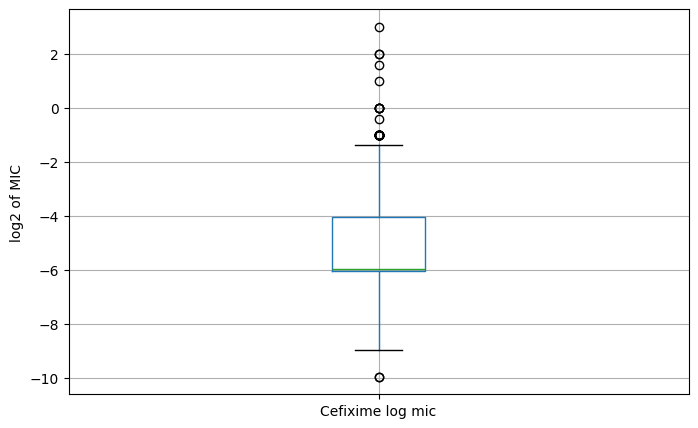

In [60]:
plt.figure(figsize=(8,5))
df.boxplot(column='Cefixime log mic')
plt.ylabel("log2 of MIC")

Some outliers are seen in the cases of azithromycin, ceftriaxone and cefixime. These outliers are above the upper fence which means they are more resistant to antibiotics than other isolates. This can be a significant piece of information because some bacteria can be resistant to all classes of antibiotics and have very high clinical significance. Therefore in this case these outliers should not be removed.

## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [61]:
# There are redundant mic columns for all antibiotics in the dataset, that needs to be dropped.
#columns with more than 61% of missing values are dropped
# Also, there are columns that are not necessary for our study, those are dropped as well.
to_drop = ['Azithromycin', 'Ciprofloxacin', 'Ceftriaxone', 'Cefixime','Tetracycline', 'Penicillin', 
           'Group','Beta.lactamase','NG_MAST', 'Group',  'tet_mic', 'pen_mic',  'log2_tet_mic',
          'log2_pen_mic', 'tet_sr',
          'pen_sr']

df.drop(columns= to_drop, inplace=True)

In [62]:
df.head()

,Sample_ID,Year,Country,Continent,Azithromycin mic,Ciprofloxacin mic,Ceftriaxone mic,Cefixime mic,Azithromycin log mic,Ciprofloxacin log mic,Ceftriaxone log mic,Cefixime log mic,Azithromycin sr,Ciprofloxacin sr,Ceftriaxone sr,Cefixime sr
0,ERR1549286,2015.0,UK,Europe,512.0,NaN,0.016,NaN,9.0,NaN,-5.965784,NaN,Resistant,NaN,Sensitive,NaN
1,ERR1549290,2015.0,UK,Europe,512.0,NaN,0.004,NaN,9.0,NaN,-7.965784,NaN,Resistant,NaN,Sensitive,NaN
2,ERR1549291,2015.0,UK,Europe,512.0,NaN,0.006,NaN,9.0,NaN,-7.380822,NaN,Resistant,NaN,Sensitive,NaN
3,ERR1549287,2015.0,UK,Europe,512.0,NaN,0.006,NaN,9.0,NaN,-7.380822,NaN,Resistant,NaN,Sensitive,NaN
4,ERR1549288,2015.0,UK,Europe,512.0,NaN,0.008,NaN,9.0,NaN,-6.965784,NaN,Resistant,NaN,Sensitive,NaN


## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [63]:
# These columms  should contain either 'Resistance' or 'Sensitive'.  
# Dropping all NaN values is the best idea, because we do not know whether the isolate is sensitive or resistant.
df.dropna(subset=['Azithromycin sr',
                 'Ciprofloxacin sr',
                'Ceftriaxone sr',
                'Cefixime sr'], inplace= True)

In [64]:
df.isnull().sum()

Sample_ID                0
Year                     0
Country                  0
Continent                0
Azithromycin mic         0
Ciprofloxacin mic        0
Ceftriaxone mic          0
Cefixime mic             0
Azithromycin log mic     0
Ciprofloxacin log mic    0
Ceftriaxone log mic      0
Cefixime log mic         0
Azithromycin sr          0
Ciprofloxacin sr         0
Ceftriaxone sr           0
Cefixime sr              0
dtype: int64

In [70]:
# Exporting the DataFrame.
df.to_csv(r'C:\Users\ardie\LaunchCode\data-analysis-projects\Final Project\Neisseria\clean_data.csv')

After dropping the NaN values from the above 4 columns, there are  no misssing values remaining, so we dont have to fill the missing values of other numerical columns with aggregated mean.

## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset?
    Yes, there were many missing values, redundant columns and some unnecessary columns.
2. Did the process of cleaning your data give you new insights into your dataset?
    Yes, the process of cleaning data helped to convert improper data into meaningful data.
3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?
    During the process of cleaning data in this dataset, a large number of rows were deleted, this might impact on data manipulation and visualization which we need to see later.